<a href="https://colab.research.google.com/github/hargurjeet/Lending-Club-CaseStudy/blob/main/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [70]:
! git clone https://github.com/hargurjeet/Lending-Club-CaseStudy.git

fatal: destination path 'Lending-Club-CaseStudy' already exists and is not an empty directory.


In [71]:
with zipfile.ZipFile("/content/Lending-Club-CaseStudy/loan.zip","r") as zip_ref:
    zip_ref.extractall("/content/Lending-Club-CaseStudy/")

# Data Understanding

All data quality issues are correctly identified and reported. 

 

Wherever required, the meanings of the variables are correctly interpreted and written either in the comments or text.

In [ ]:
file_path = r'/content/Lending-Club-CaseStudy/loan.csv'
df = pd.read_csv(file_path)
df.head()

In [73]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [ ]:
df1 = pd.read_excel('/content/Lending-Club-CaseStudy/Data_Dictionary.xlsx')
df1

In [88]:
df.shape

(39717, 111)

In [ ]:
def view_all(df):
  pd.set_option('display.max_rows', None)
  pd.set_option('max_columns', None)
  pd.set_option('display.max_colwidth', None)
  return df.style.set_properties(**{'text-align': 'left'})

view_all(df1)

# Data Cleaning and Manipulation

Data quality issues are addressed in the right way (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 

 

If applicable, data is converted to a suitable and convenient format to work with using the right methods.

 

 

Manipulation of strings and dates is done correctly wherever required.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Identifying missing values

In [77]:
# Checking the missing values
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [78]:
# Funtion to remove the columns where 90% of values are missing
def columns_with_high_missing_values_removed(df):
  missing_percent = (df.isnull().sum()/len(df))*100
  for feature, values in zip(missing_percent.index, missing_percent):
    if values >= 90:
      missing_percent.drop(feature, inplace=True)
  return missing_percent

df2 = columns_with_high_missing_values_removed(df)
df2

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [79]:
df2.shape

(55,)

In [80]:
print(df2.loc[lambda x:(x<70) & (x>10)])

desc                      32.580507
mths_since_last_delinq    64.662487
dtype: float64


In [83]:
## There is pratically no logical ways to fill these missing values
## droping these features for now
df3 = df2.drop(['desc', 'mths_since_last_delinq'])
df3.shape


(53,)

In [84]:
# Filtering columns with low missing values
low_missing_values_col = df3.loc[lambda x:(x<10) & (x>0)].sort_values(ascending=False).index
low_missing_values_col

Index(['emp_title', 'emp_length', 'pub_rec_bankruptcies', 'last_pymnt_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'revol_util',
       'tax_liens', 'title', 'last_credit_pull_d'],
      dtype='object')

In [85]:
df[low_missing_values_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   37258 non-null  object 
 1   emp_length                  38642 non-null  object 
 2   pub_rec_bankruptcies        39020 non-null  float64
 3   last_pymnt_d                39646 non-null  object 
 4   collections_12_mths_ex_med  39661 non-null  float64
 5   chargeoff_within_12_mths    39661 non-null  float64
 6   revol_util                  39667 non-null  object 
 7   tax_liens                   39678 non-null  float64
 8   title                       39706 non-null  object 
 9   last_credit_pull_d          39715 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.0+ MB


In [86]:
df[low_missing_values_col].head()

,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,revol_util,tax_liens,title,last_credit_pull_d
0,NaN,10+ years,0.0,Jan-15,0.0,0.0,83.70%,0.0,Computer,May-16
1,Ryder,< 1 year,0.0,Apr-13,0.0,0.0,9.40%,0.0,bike,Sep-13
2,NaN,10+ years,0.0,Jun-14,0.0,0.0,98.50%,0.0,real estate business,May-16
3,AIR RESOURCES BOARD,10+ years,0.0,Jan-15,0.0,0.0,21%,0.0,personel,Apr-16
4,University Medical Group,1 year,0.0,May-16,0.0,0.0,53.90%,0.0,Personal,May-16


In [89]:
## As the missing values of low and there is no logical ways of imputting them all
## Hence I am dropping the rows containing missing values
# df4 = df3.drop(low_missing_values_col)
df4 = df[df3.index].dropna()
df4.shape

(36431, 53)

In [90]:
pd.reset_option('all')
pd.set_option('max_columns', None)
df4.head(2)

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.0,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.0,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Data Standardization

In [105]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  int64  
 6   int_rate                    36431 non-null  float64
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  int64  
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  364

Following columns can be fixed to analyse them better
- Term, emp_length, Interest rate, revol_util  - Can be converted to numberic values
- issue_d, earliest_cr_line, last_pymnt_d,last_credit_pull_d - Can be segegated to year and month for better analysis

In [104]:
## Fixing the numberic columns
df4.term = df4.term.apply(lambda x: x.strip(' months')).astype('int64')
df4.emp_length = df4.emp_length.apply(lambda x: x.strip(' years < year +')).astype('int64')
df4.int_rate = df4.int_rate.apply(lambda x: x.strip(' %')).astype('float')
df4.revol_util = df4.revol_util.apply(lambda x: x.strip(' %')).astype('float')

In [103]:
df4.revol_util.apply(lambda x: x.strip(' %')).astype('float')

1         9.4
3        21.0
4        53.9
5        28.3
6        85.6
         ... 
39433    47.4
39475    18.6
39551    96.5
39562    68.7
39623    62.9
Name: revol_util, Length: 36431, dtype: float64

In [18]:
df5.select_dtypes(include='object')

,term,int_rate,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
0,36 months,10.65%,B,B2,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,Jan-85,f,INDIVIDUAL
1,60 months,15.27%,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,Apr-99,f,INDIVIDUAL
2,36 months,15.96%,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,Nov-01,f,INDIVIDUAL
3,36 months,13.49%,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,Feb-96,f,INDIVIDUAL
4,60 months,12.69%,B,B5,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,Jan-96,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,Nov-90,f,INDIVIDUAL
39713,36 months,10.28%,C,C1,RENT,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,Dec-86,f,INDIVIDUAL
39714,36 months,8.07%,A,A4,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,Oct-98,f,INDIVIDUAL
39715,36 months,7.43%,A,A2,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,Nov-88,f,INDIVIDUAL


## EDA

In [19]:
(df5.loan_status.value_counts()/ len(df5))*100

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [20]:
df5.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Loan Statuses')

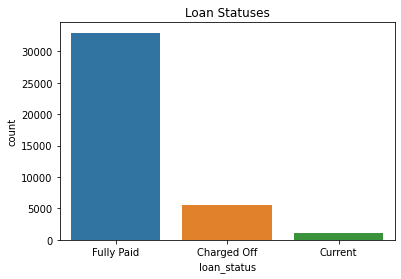

In [21]:
sns.countplot(x=df5.loan_status)
plt.title('Loan Statuses')

14 % or around 6K loan applicants has defaulted on the loans. Let us filter out these applicants in our analysis

In [22]:
charged_off_applicants = df5[df5.loan_status=='Charged Off']
charged_off_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,119.66,1,INDIVIDUAL,0,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,958xx,CA,5.55,0,Apr-04,2,11,0,5210,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,152.39,1,INDIVIDUAL,0,0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,774xx,TX,18.08,0,Sep-04,0,2,0,9279,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,121.45,1,INDIVIDUAL,0,0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,245xx,VA,10.08,0,Apr-04,1,4,0,10452,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,305.38,1,INDIVIDUAL,0,0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,RENT,100000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,951xx,CA,7.06,0,May-91,2,14,0,11997,29,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,325.74,1,INDIVIDUAL,0,0


In [23]:
charged_off_applicants.purpose.value_counts()/len(charged_off_applicants)

debt_consolidation    0.491736
other                 0.112493
credit_card           0.096321
small_business        0.084414
home_improvement      0.061667
major_purchase        0.039453
car                   0.028434
medical               0.018838
wedding               0.017061
moving                0.016350
house                 0.010485
educational           0.009952
vacation              0.009419
renewable_energy      0.003377
Name: purpose, dtype: float64

In [24]:
df5[~(df5.loan_status=='Charged Off')].purpose.value_counts()/34090

debt_consolidation    0.465650
credit_card           0.134585
other                 0.098563
home_improvement      0.077119
major_purchase        0.057642
car                   0.040745
small_business        0.039689
wedding               0.024963
medical               0.017219
moving                0.014403
vacation              0.009622
house                 0.009446
educational           0.007891
renewable_energy      0.002464
Name: purpose, dtype: float64

Around 40% of these loan applicants were not verfied

In [25]:
df5.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [26]:
relevant_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan','zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt']

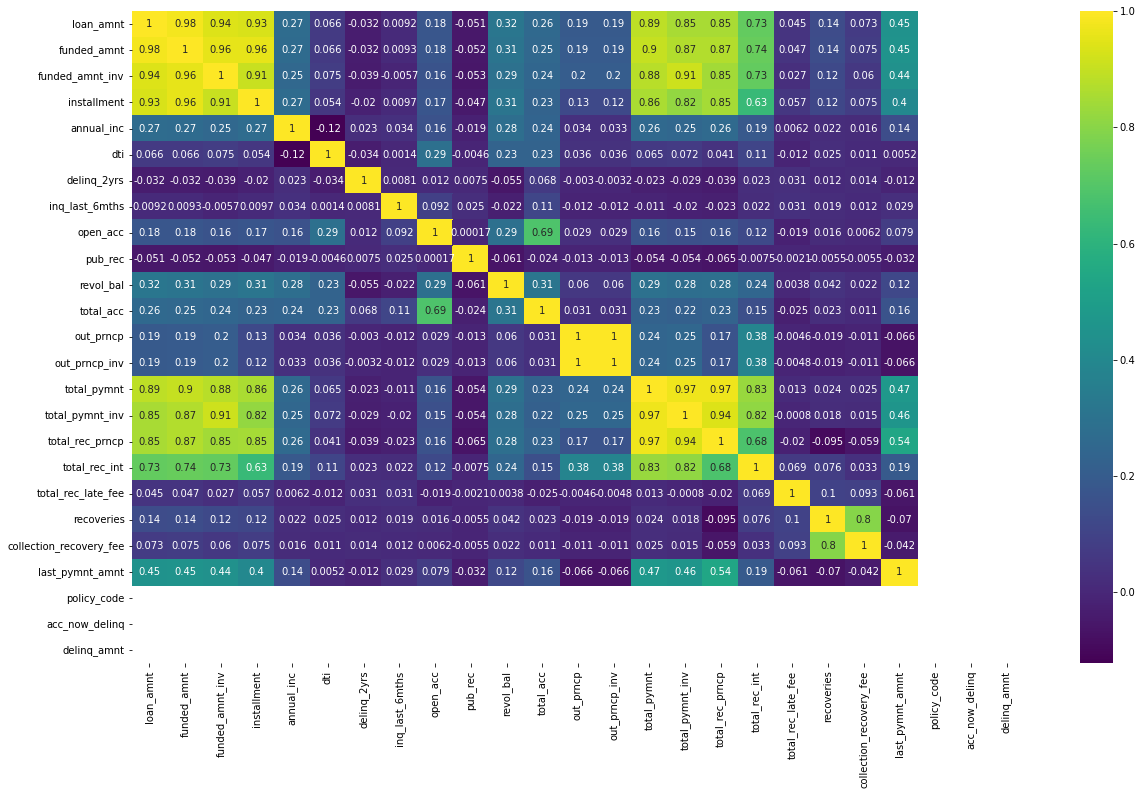

In [30]:
plt.figure(figsize=(20, 12))
sns.heatmap(df5[relevant_features].corr(), annot=True, cmap='viridis')
plt.show()

Notice the following relationship
- loan amount with installment amount
- loan amount with funded amount

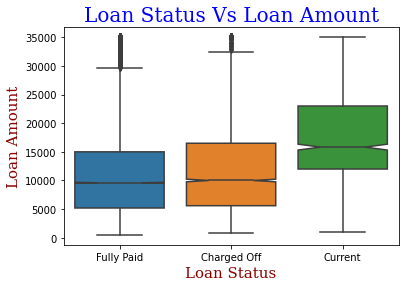

In [51]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

sns.boxplot(data=df5, x=df5.loan_status , y=df5.loan_amnt, notch=True)

plt.title('Loan Status Vs Loan Amount',  fontdict = font1)
plt.xlabel("Loan Status", fontdict = font2)
plt.ylabel("Loan Amount", fontdict = font2)
plt.show()

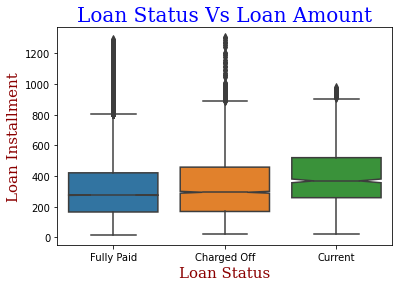

In [52]:
sns.boxplot(data=df5, x=df5.loan_status , y=df5.installment, notch=True)
plt.title('Loan Status Vs Loan Amount',  fontdict = font1)
plt.xlabel("Loan Status", fontdict = font2)
plt.ylabel("Loan Installment", fontdict = font2)
plt.show()